### 딥-러닝 과정 CNN | 2020.02.27. 

### 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [2]:
# 1. 데이터 불러오기
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


0


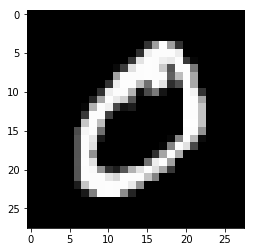

In [5]:
# 2. 이미지 데이터 확인하기 🖼
import matplotlib.pyplot as plt

image = x_train[1]
plt.imshow(image, cmap = plt.cm.gray)
print(y_train[1])

In [18]:
# 3-1. 이미지 데이터 전처리 : 2차원->3차원 🌟🌟🌟
x_train_re = x_train.reshape((60000, 28,28,1))
x_test_re = x_test.reshape((10000, 28,28,1))

print(x_train_re.shape)
print(x_test_re.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [19]:
# 3-2. 이미지 데이터 전처리 : Normalzation 
x_train_re = x_train_re / 255
x_test_re = x_test_re / 255

In [21]:
# 4. Label 전처리 (one-hot encoding) 
from keras.utils import to_categorical

y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

print(y_train_en[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [23]:
# 5. 모델 생성 : CNN 🌟🌟🌟
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

print(model.summary)

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7fedc806f1d0>>


In [24]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# 7. 모델 학습시키기
history = model.fit(x_train_re, y_train_en, nb_epoch = 100, validation_split=0.4, batch_size=10)

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 36000 samples, validate on 24000 samples
Epoch 1/100
36000/36000 [==============================] - 29s 812us/step - loss: 0.1561 - accuracy: 0.9529 - val_loss: 0.0760 - val_accuracy: 0.9775
Epoch 2/100
36000/36000 [==============================] - 23s 635us/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0679 - val_accuracy: 0.9797
Epoch 3/100
36000/36000 [==============================] - 23s 639us/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0646 - val_accuracy: 0.9800
Epoch 4/100
36000/36000 [==============================] - 23s 634us/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0849 - val_accuracy: 0.9796
Epoch 5/100
36000/36000 [==============================] - 23s 633us/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0765 - val_accuracy: 0.9826
Epoch 6/100
36000/36000 [==============================] - 23s 633us/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.0840 - val_accuracy: 0.9815
Epoch 7/100
36000/36000 [=========================

Epoch 55/100
36000/36000 [==============================] - 23s 642us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.2237 - val_accuracy: 0.9859
Epoch 56/100
36000/36000 [==============================] - 23s 643us/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.2490 - val_accuracy: 0.9845
Epoch 57/100
36000/36000 [==============================] - 23s 639us/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.2868 - val_accuracy: 0.9828
Epoch 58/100
36000/36000 [==============================] - 23s 636us/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.2435 - val_accuracy: 0.9849
Epoch 59/100
36000/36000 [==============================] - 23s 642us/step - loss: 1.2268e-05 - accuracy: 1.0000 - val_loss: 0.2386 - val_accuracy: 0.9853
Epoch 60/100
36000/36000 [==============================] - 23s 635us/step - loss: 7.5182e-07 - accuracy: 1.0000 - val_loss: 0.2300 - val_accuracy: 0.9857
Epoch 61/100
36000/36000 [==============================] - 23s 637us/step - loss: 2.0

In [27]:
# 8. 모델 평가하기
train_acc = model.evaluate(x_train_re, y_train_en)
test_acc = model.evaluate(x_test_re, y_test_en)

print(train_acc)
print(test_acc)

10000/10000 [==============================] - 1s 76us/step
[0.09707885416873052, 0.9944833517074585]
[0.18960208258898714, 0.987500011920929]


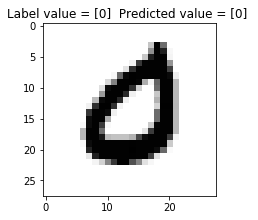

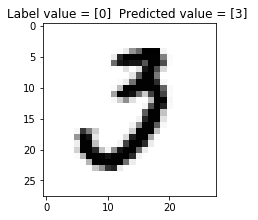

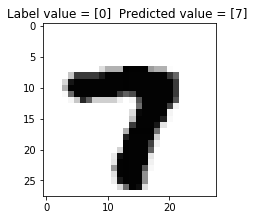

In [30]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼

import numpy
for index in numpy.random.choice(len(y_test_en), 3, replace = False):
    predicted = model.predict(x_test_re[index:index + 1])[0]
    label = y_test[index]
    result_label = numpy.where(label == numpy.amax(label))
    result_predicted = numpy.where(predicted == numpy.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (result_label[0], result_predicted[0])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = x_test
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()

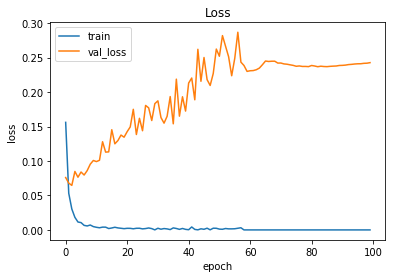

In [31]:
# 10. 학습 시각화하기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc = 'upper left')
plt.show()